In [1]:
import numpy as np
import seaborn as sns
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\user\Desktop\cementStrengthPrediction\code\cement_strength_reg\Training_FileFromDB\InputFile.csv")

In [3]:
df.shape

(1030, 9)

In [4]:
df.columns

Index(['Cement', 'Blast Furnace Slag _component_2', 'Fly Ash _component_3',
       'Water_component_4', 'Superplasticizer_component_5',
       'Coarse Aggregate_component_6', 'Fine Aggregate_component_7', 'Age_day',
       'Concrete_compressive _strength'],
      dtype='object')

In [5]:
df.isnull().sum()

Cement                             0
Blast Furnace Slag _component_2    0
Fly Ash _component_3               0
Water_component_4                  0
Superplasticizer_component_5       0
Coarse Aggregate_component_6       0
Fine Aggregate_component_7         0
Age_day                            0
Concrete_compressive _strength     0
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


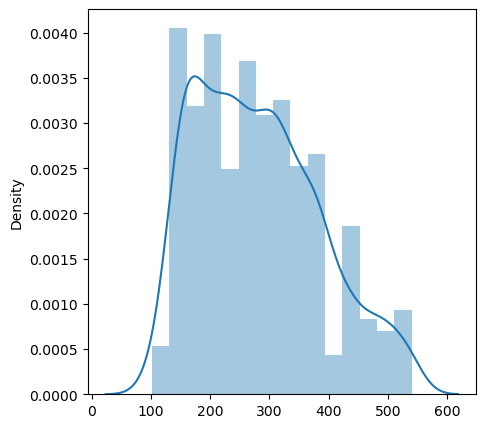

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


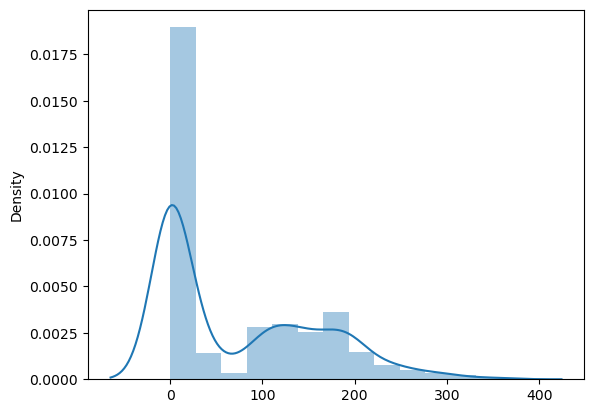

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


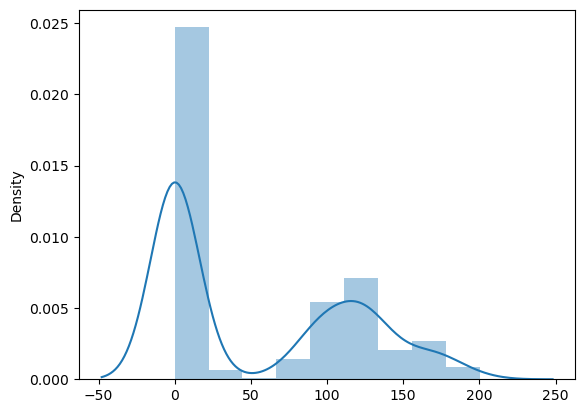

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


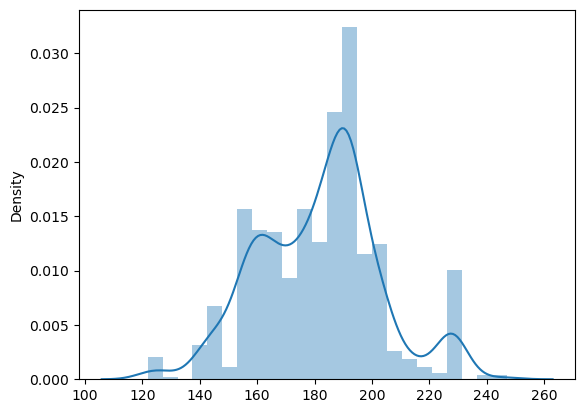

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


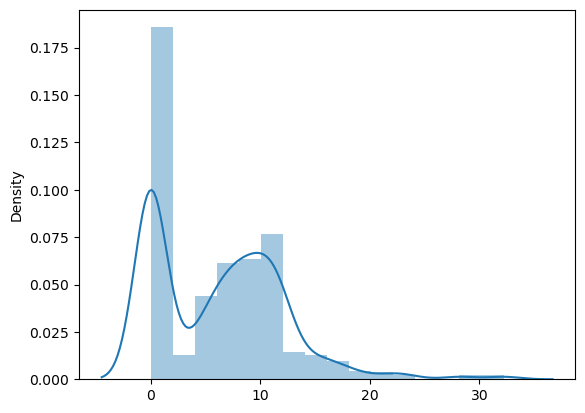

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


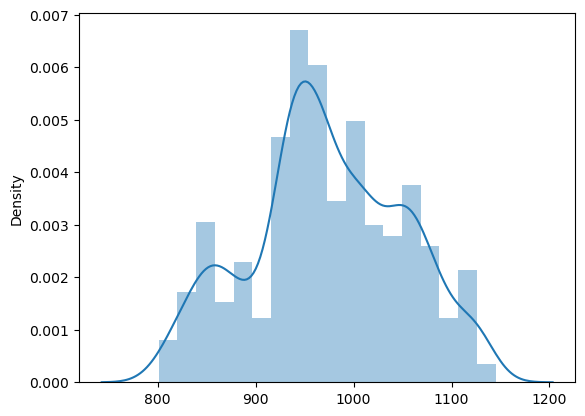

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


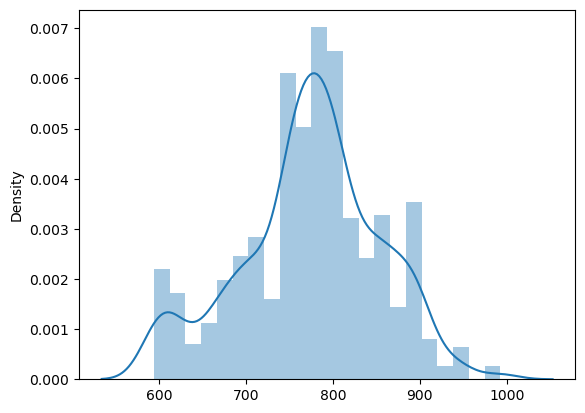

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


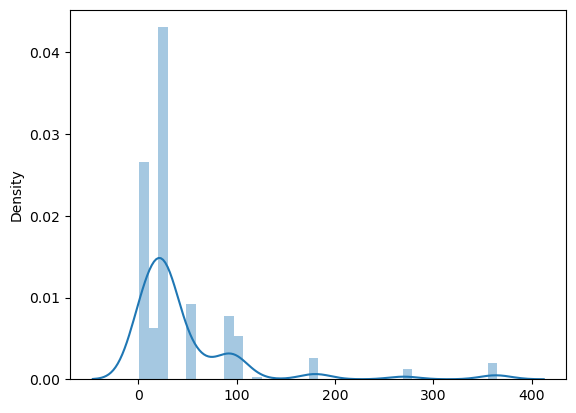

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


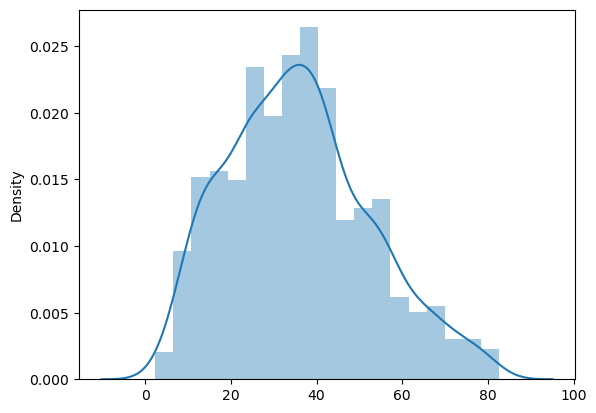

In [6]:
plt.figure(figsize=(5,5))
for i in df.columns:
    sns.distplot(x=df[i],kde=True)
    plt.show()

In [7]:
df.dtypes

Cement                             float64
Blast Furnace Slag _component_2    float64
Fly Ash _component_3               float64
Water_component_4                  float64
Superplasticizer_component_5       float64
Coarse Aggregate_component_6       float64
Fine Aggregate_component_7         float64
Age_day                              int64
Concrete_compressive _strength     float64
dtype: object

In [8]:
df['Age_day'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1], dtype=int64)

In [9]:
df[df.duplicated()]


,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


In [10]:
df.drop_duplicates()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ##feature scaling
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [12]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
X = df.drop(labels=['Concrete_compressive _strength'],axis=1)
Y = df[['Concrete_compressive _strength']]

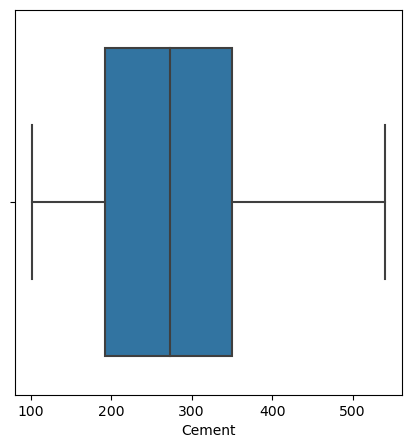

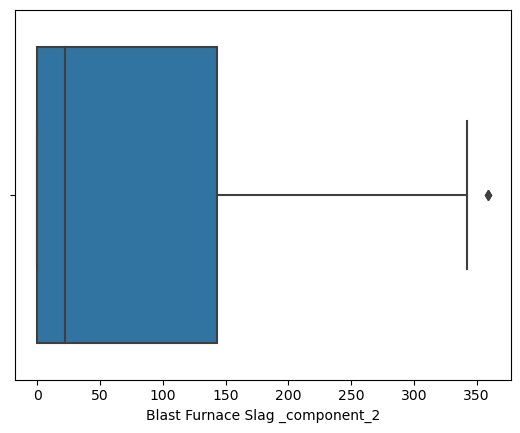

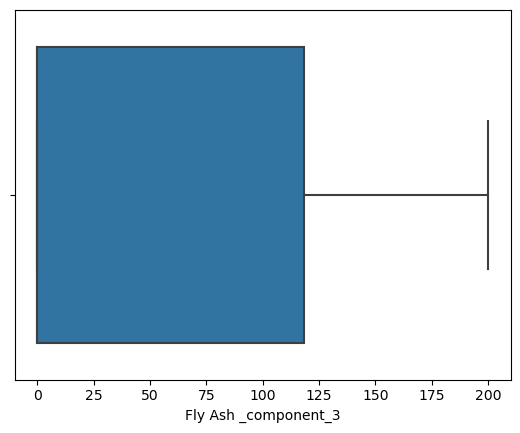

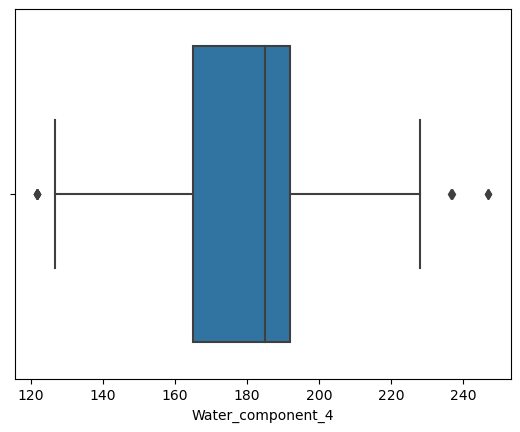

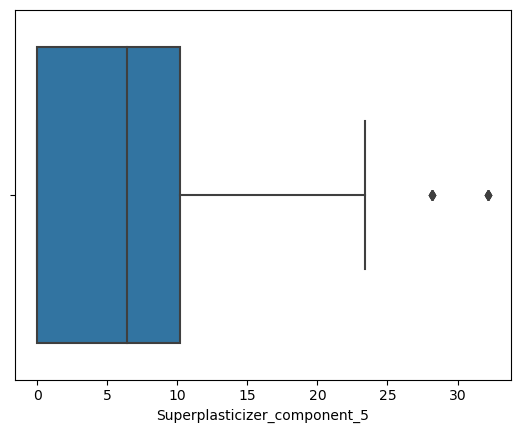

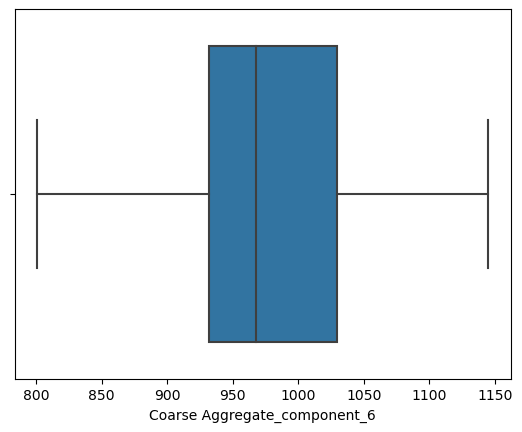

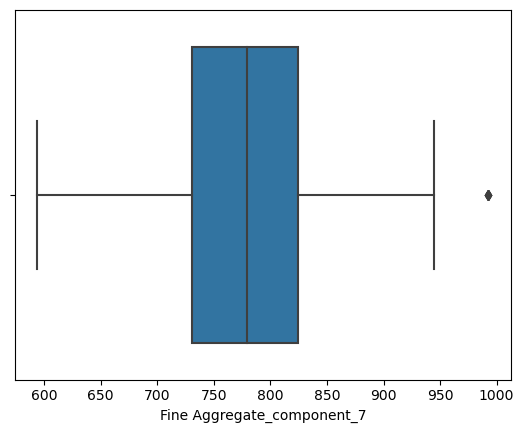

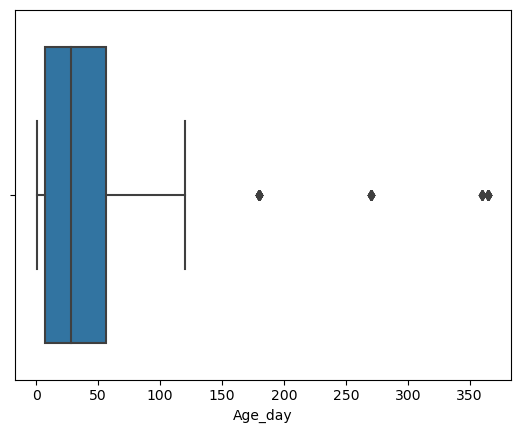

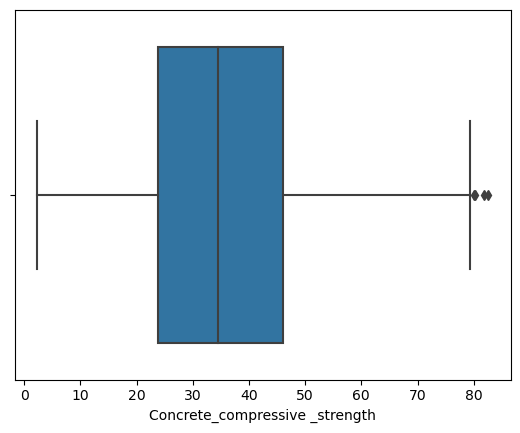

In [14]:
plt.figure(figsize=(5,5))
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

<AxesSubplot:>

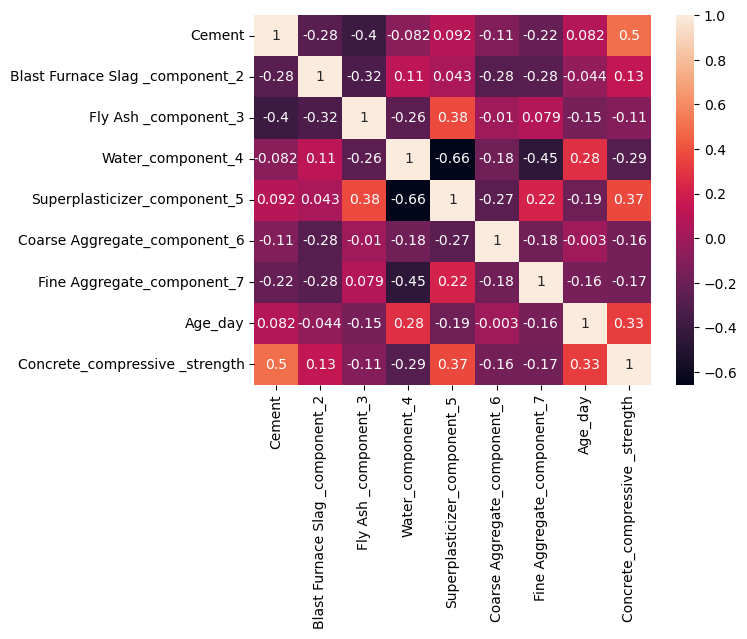

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
for i in range(len(df.columns)-1):
    print(f" {df.columns[i]} vif {variance_inflation_factor(X_train,i)}")

NameError: name 'X_train' is not defined

In [ ]:
numerical_cols = X.select_dtypes(exclude='object').columns
print(numerical_cols)

In [ ]:

num_pipeline= Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)



preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
])

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())



In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
models={
    'LinearRegression':LinearRegression(),
    'L1_regularization':Lasso(),
    'L2_regularization':Ridge(),
    'ElasticNet':ElasticNet()
}


import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
for i in list(models.values()):
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    mae,rmse,r2_square= evaluate_model(y_test,y_pred)

    print(f"Model: {i}")
    print(f"mae: {mae}, rmse: {rmse}, r2_score: {r2_square}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 

regressor.fit(X_train,y_train) 

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
regressor.score(X_test,y_pred)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix , roc_curve, roc_auc_score
from pandas_profiling import ProfileReport

In [ ]:
grid_param={
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}

In [ ]:
grid_search = GridSearchCV(param_grid= grid_param , estimator= regressor)

In [ ]:
y_train = np.ravel(y_train)

In [ ]:
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_regressor= RandomForestRegressor(n_estimators = 150, max_depth=4, random_state = 0)
 

best_regressor.fit(X_train,y_train) 

In [ ]:
y_pred = best_regressor.predict(X_test)

In [ ]:
best_regressor.score(X_test,y_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
r2_score(y_test,y_pred)